In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer



In [2]:
n_neighbors = 2

# import some data to play with
dataset = pd.read_csv('Data.csv')
dataset['Max'] = dataset[['affiliative', 'selfenhancing',
                         'agressive', 'selfdefeating']].idxmax(axis=1)
X = dataset.iloc[:,:-7].values

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
Y = dataset.iloc[:,-1]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:])
X[:, 1:] = imputer.transform(X[:, 1:])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

               precision    recall  f1-score   support

  affiliative       0.82      0.99      0.90       169
    agressive       0.60      0.50      0.55         6
selfdefeating       1.00      0.17      0.29         6
selfenhancing       0.60      0.09      0.15        34

     accuracy                           0.81       215
    macro avg       0.76      0.44      0.47       215
 weighted avg       0.79      0.81      0.76       215



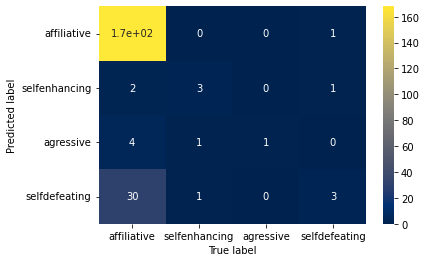

               precision    recall  f1-score   support

  affiliative       0.87      0.98      0.92       169
    agressive       0.67      0.67      0.67         6
selfdefeating       0.50      0.33      0.40         6
selfenhancing       0.69      0.32      0.44        34

     accuracy                           0.85       215
    macro avg       0.68      0.57      0.61       215
 weighted avg       0.83      0.85      0.82       215



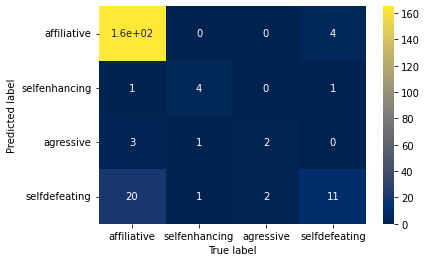

In [4]:
for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    ac = accuracy_score(Y_test,Y_pred)
    cm = confusion_matrix(Y_test,Y_pred)
    sns.heatmap(cm, annot=True, cmap="cividis", xticklabels=dataset.iloc[:, -8:-4].columns, yticklabels=dataset.iloc[:, -8:-4].columns)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    print(classification_report(Y_test, Y_pred))
    plt.show()

